In [10]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


In [2]:
airline = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

# MA
## Moving Averages
In this section we'll compare <em>Simple Moving Averages</em> to <em>Exponentially Weighted Moving Averages</em> in terms of complexity and performance.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong><a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html'>pandas.DataFrame.rolling</a></strong><font color=black>(window)</font>&nbsp;&nbsp;
Provides rolling window calculations<br>
<strong><a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html'>pandas.DataFrame.ewm</a></strong><font color=black>(span)</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Provides exponential weighted functions</tt></div></div>

### Perform standard imports and load the dataset
For these examples we'll use the International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

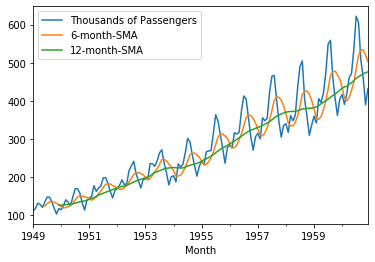

In [4]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

airline.plot();

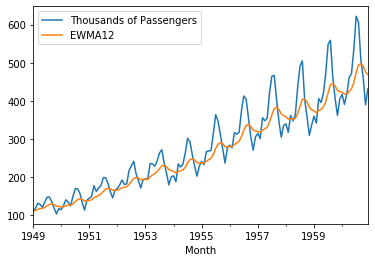

In [5]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()
airline[['Thousands of Passengers','EWMA12']].plot();

## Comparing SMA to EWMA

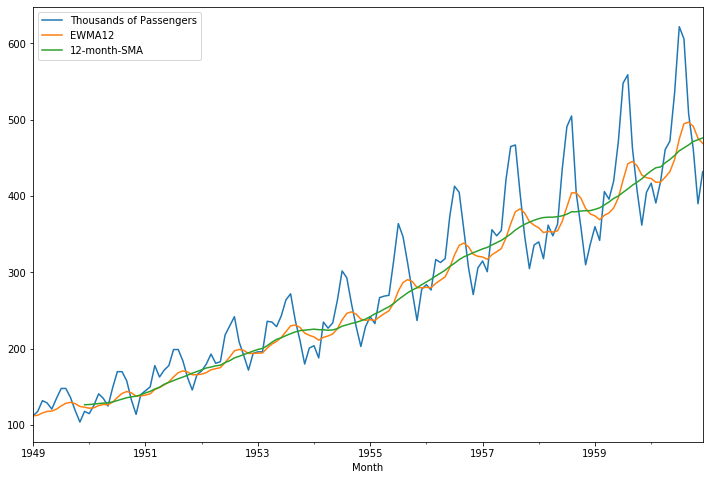

In [6]:
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

# Time Series: 
<b>
    It's a sequence of discrete-timed data, i.e. series of data points indexed in successively equal space points in time.
</b> <br>
Components for Time Series 
1) Trend
2) Seasonal Variations
3) Cyclic Variations
4) Random or Irregular movements

# Trends: 
<b>The trend is the component of a time series that represents variations of low frequency in a time series, the high and medium frequency fluctuations having been filtered out. </b> <br>
The trend shows the general tendency of the data to increase or decrease during a long period of time. <br>
1) Upward <br>
2) Downward <br>
3) Horizontal/Stationary <br>

# Seasionality: 
<b>A repeating trend, i.e. The repeating short-term cycle in the series.  </b> <br>

# Cyclical Component:
Trends with no set repetitions

## Hodrick Prescott Filter
It helps to separate time series (y_t) into a trend component(τ_t) and cyclical component(c_t) <br>
It is achieved by minimising Quadratic Loss Function (wher α is considered to be smoothning parameter)

# Error Trend Seasionality (ETS Model)

Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.
<br> Time series decomposition with ETS is used to separate components of TS Data, like Hodrick Prescott Filter 

## These components are defined as follows: 
<br> 1) <b>Level</b>: The average value in the series. 
<br> 2) <b>Trend</b>: The increasing or decreasing value in the series. 
<br> 3) <b>Seasonality</b>: The repeating short-term cycle in the series. 
<br> 4) <b>Noise</b>: The random variation in the series. 
<br> <br> All series have a level and noise. The trend and seasonality components are optional.

## We visualize these components to better understand the nature of the data 
<br> 1) <b>Observed</b>: Actual data 
<br> 2) <b>Trend</b>: Shows general growth/decline patter of observed data point, to learn whether its a linear component or exponential component 
<br> 3) <b>Season</b>: Observed's repetitive data about seasonal and then remove trend, i.e. straightend out observed in the absence of trend 
<br> 4) <b>Residual</b>: Highlights the presence of noise in the dataset

## ETS Model are of 2 kinds 
<br> 1) <b>Additive Model</b>: When trend is linear and Trend and Seasonality seems to be constant over time (e.g. increase/decrease by x% or xyz number of customers) 
y(t) = Level + Trend + Seasonality + Noise 
<br> 2) <b>Multiplicative Model</b>: When the trend is non-linear in nature such as quadratic or exponential., i.e. every year we double the profit/loss 
<br> y(t) = Level * Trend * Seasonality * Noise


## Time Series Component

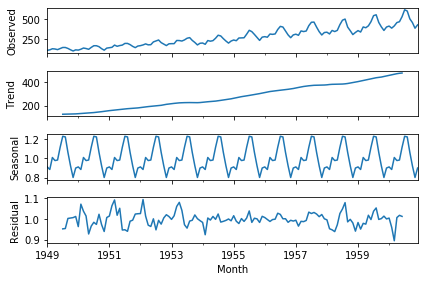

In [7]:
# Using mulitplicative model since data is not linear in nature
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')  # model='mul' also works
result.plot();

# ACF and PACF

In [8]:
df1 = pd.read_csv("../Data/airline_passengers.csv", index_col="Month", parse_dates=True)
df1.index.freq="MS"

df2 = pd.read_csv("../Data/DailyTotalFemaleBirths.csv", index_col="Date", parse_dates=True)
df2.index.freq = "D"

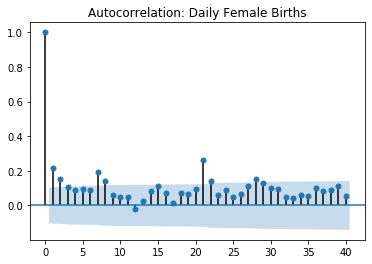

In [11]:
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation: Daily Female Births'
lags = 40
plot_acf(df2,title=title,lags=lags);

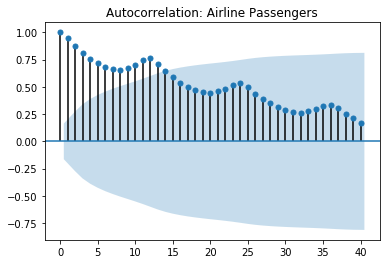

In [12]:
title = 'Autocorrelation: Airline Passengers'
lags = 40
plot_acf(df1,title=title,lags=lags);

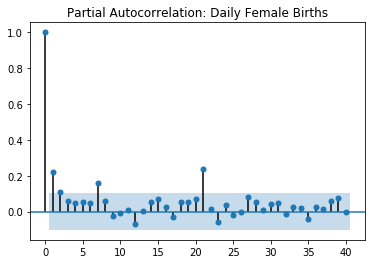

In [13]:
title='Partial Autocorrelation: Daily Female Births'
lags=40
plot_pacf(df2,title=title,lags=lags);

## Test for Stationarity: 
> Augmented Dickey-Fueller Test <br>

## AIC: Akaike Information Criterion
It evaluates a bunch of models, and estimates the quality of each model w.r.t. to other models

## Bayseian Information Criterion
Similar to AIC, only the maths behind is different, i.e. it uses bayseian approach

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.ccovf.html'>stattools.ccovf</a></strong><font color=black>(x, y[, unbiased, demean])</font>&nbsp;&nbsp;crosscovariance for 1D<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.ccf.html'>stattools.ccf</a></strong><font color=black>(x, y[, unbiased])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;cross-correlation function for 1d<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.periodogram.html'>stattools.periodogram</a></strong><font color=black>(X)</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Returns the periodogram for the natural frequency of X<br>
    
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html'>stattools.adfuller</a></strong><font color=black>(x[, maxlag, regression, …])</font>&nbsp;&nbsp;Augmented Dickey-Fuller unit root test<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.kpss.html'>stattools.kpss</a></strong><font color=black>(x[, regression, lags, store])</font>&nbsp;&nbsp;&nbsp;&nbsp;Kwiatkowski-Phillips-Schmidt-Shin test for stationarity.<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.coint.html'>stattools.coint</a></strong><font color=black>(y0, y1[, trend, method, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Test for no-cointegration of a univariate equation<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.bds.html'>stattools.bds</a></strong><font color=black>(x[, max_dim, epsilon, distance])</font>&nbsp;&nbsp;Calculate the BDS test statistic for independence of a time series<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.q_stat.html'>stattools.q_stat</a></strong><font color=black>(x, nobs[, type])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Returns Ljung-Box Q Statistic<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.grangercausalitytests.html'>stattools.grangercausalitytests</a></strong><font color=black>(x, maxlag[, …])</font>&nbsp;Four tests for granger non-causality of 2 timeseries<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.levinson_durbin.html'>stattools.levinson_durbin</a></strong><font color=black>(s[, nlags, isacov])</font>&nbsp;&nbsp;&nbsp;Levinson-Durbin recursion for autoregressive processes<br>

<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tools.eval_measures.mse.html'>stattools.eval_measures.mse</a></strong><font color=black>(x1, x2, axis=0)</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;mean squared error<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tools.eval_measures.rmse.html'>stattools.eval_measures.rmse</a></strong><font color=black>(x1, x2, axis=0)</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;root mean squared error<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tools.eval_measures.meanabs.html'>stattools.eval_measures.meanabs</a></strong><font color=black>(x1, x2, axis=0)</font>&nbsp;&nbsp;mean absolute error<br>
</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test'>Wikipedia:</a></strong>&nbsp;&nbsp;<font color=black>Augmented Dickey–Fuller test</font><br>
<strong>
<a href='https://otexts.com/fpp2/accuracy.html'>Forecasting: Principles and Practice:</a></strong>&nbsp;&nbsp;<font color=black>Evaluating forecast accuracy</font>

</div>



# Tests for Stationarity
A time series is <em>stationary</em> if the mean and variance are fixed between any two equidistant points. That is, no matter where you take your observations, the results should be the same. A times series that shows seasonality is <em>not</em> stationary.

A test for stationarity usually involves a [unit root](https://en.wikipedia.org/wiki/Unit_root_test) hypothesis test, where the null hypothesis $H_0$ is that the series is <em>nonstationary</em>, and contains a unit root. The alternate hypothesis $H_1$ supports stationarity. The augmented Dickey-Fuller Test is one such test. 

## Augmented Dickey-Fuller Test
To determine whether a series is stationary we can use the [augmented Dickey-Fuller Test](https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test). In this test the null hypothesis states that $\phi = 1$ (this is also called a unit test). The test returns several statistics we'll see in a moment. Our focus is on the p-value. A small p-value ($p<0.05$) indicates strong evidence against the null hypothesis.

To demonstrate, we'll use a dataset we know is <em>not</em> stationary, the airline_passenger dataset. First, let's plot the data along with a 12-month rolling mean and standard deviation:

In [55]:
dftest = adfuller(df1["Thousands of Passengers"])
dfout = pd.Series(dftest[0:4],index=['ADF Test Statistics','p-value','number of lags','number of observations'])
for key,val in dftest[4].items():
    dfout[f'critical value ({key})'] = val
dfout

ADF Test Statistics         0.815369
p-value                     0.991880
number of lags             13.000000
number of observations    130.000000
critical value (1%)        -3.481682
critical value (5%)        -2.884042
critical value (10%)       -2.578770
dtype: float64

#  USER DEFINED ***ADF*** FUNCTION (AUGMENTED DICKEY FULLER TEST)

In [56]:
# User defined ADF function

from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    series.plot(figsize=(18,9))
    if result[1] <= 0.05:
        print("\nStrong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        
        print("Data has no unit root and is stationary")
    else:
        print("\nWeak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        
        print("Data has a unit root and is non-stationary")

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770

Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


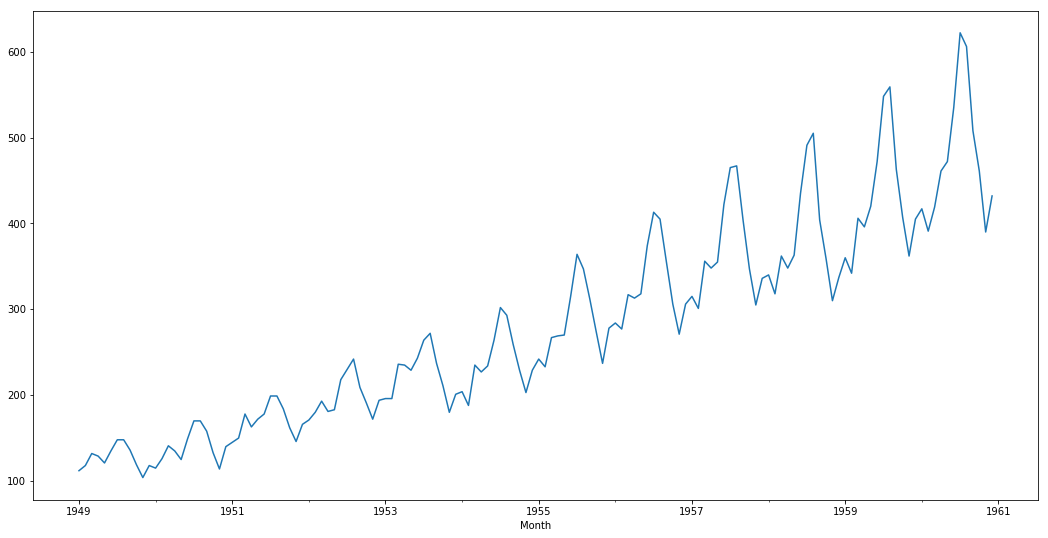

In [57]:
adf_test(df1['Thousands of Passengers'])

# GRANGER CASUALITY TEST
The GRANGER CASUALITY TEST is a hypothesis test to determine if one TSD is helpful in forecasting the other TSD.

***Cor-relation ≠ Causation***

> <ins>*Correlation*</ins> is a statistical measure (expressed as a number) that describes the size and direction of a relationship between two or more variables. A correlation between variables, however, does not automatically mean that the change in one variable is the cause of the change in the values of the other variable.
>
> <ins>*Causation*</ins> indicates that one event is the result of the occurrence of the other event; i.e. there is a causal relationship between the two events. This is also referred to as cause and effect.

In [59]:
df3=pd.read_csv("../Data/samples.csv",index_col=0, parse_dates=True)
df3.index.freq="MS"
df3.head()

,a,b,c
1950-01-01,36,27,0
1950-02-01,58,22,3
1950-03-01,61,17,5
1950-04-01,37,15,8
1950-05-01,66,13,8


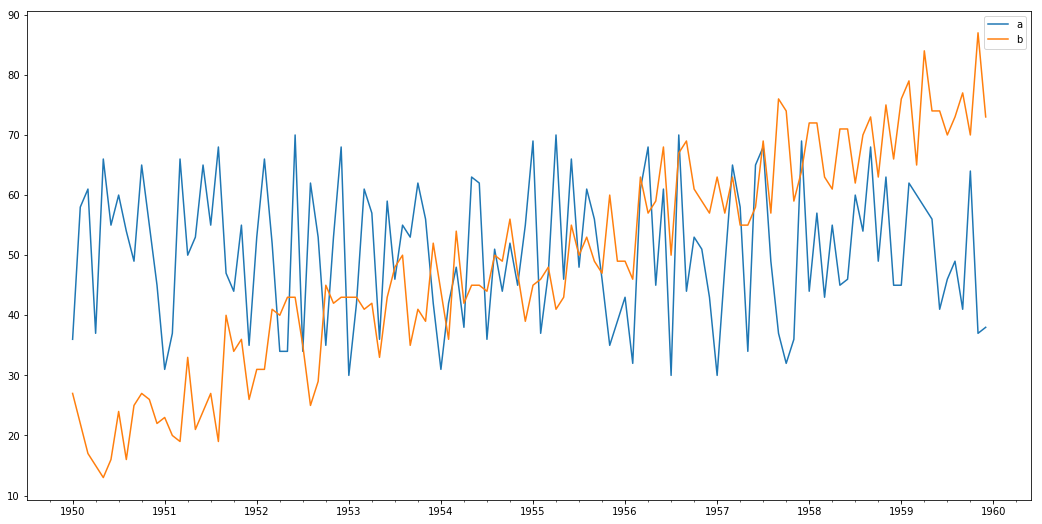

In [60]:
df3[['a','b']].plot(figsize=(18,9))

In [61]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df3[['a','b']],maxlag=4);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8657  , p=0.1746  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.9140  , p=0.1665  , df=1
likelihood ratio test: chi2=1.8988  , p=0.1682  , df=1
parameter F test:         F=1.8657  , p=0.1746  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9723  , p=0.1439  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=4.1192  , p=0.1275  , df=2
likelihood ratio test: chi2=4.0489  , p=0.1321  , df=2
parameter F test:         F=1.9723  , p=0.1439  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1777  , p=0.3216  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=3.7580  , p=0.2888  , df=3
likelihood ratio test: chi2=3.6989  , p=0.2959  , df=3
parameter F test:         F=1.1777  , p=0.3216  , df_denom=110, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1769  , p=0.3252  

In [62]:
grangercausalitytests(df3[['a','c']],maxlag=4);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1292  , p=0.7199  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=0.1325  , p=0.7158  , df=1
likelihood ratio test: chi2=0.1325  , p=0.7159  , df=1
parameter F test:         F=0.1292  , p=0.7199  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8111  , p=0.4469  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=1.6940  , p=0.4287  , df=2
likelihood ratio test: chi2=1.6820  , p=0.4313  , df=2
parameter F test:         F=0.8111  , p=0.4469  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4467  , p=0.7201  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.4255  , p=0.6996  , df=3
likelihood ratio test: chi2=1.4169  , p=0.7016  , df=3
parameter F test:         F=0.4467  , p=0.7201  , df_denom=110, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6276  , p=0.6438  

## Monthly and Quaterly Seasonal Component locating

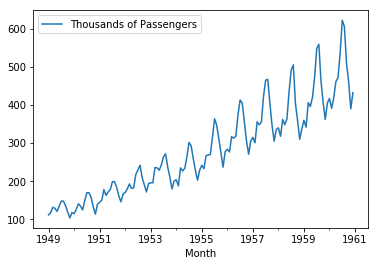

In [70]:
df=pd.read_csv("../Data/airline_passengers.csv", index_col="Month", parse_dates=True)
df.index.freq="MS"
df.plot();

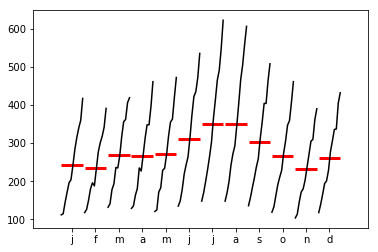

In [71]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

# Note: add a semicolon to prevent two plots being displayed in jupyter
month_plot(df['Thousands of Passengers']);

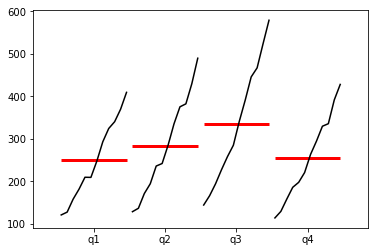

In [73]:
# Since data is a month level, we will have to resample it at Quaterly format
dfq = df['Thousands of Passengers'].resample(rule='Q').mean()
quarter_plot(dfq);

### More on resampling data: [GeeksForGeeks](https://www.geeksforgeeks.org/python-pandas-dataframe-resample/)
>monthly_resampled_data = df.close.resample('M').mean() <br>
>weekly_resampled_data = df.open.resample('W').mean() <br>
>Quarterly_resampled_data = df.open.resample('Q').mean() <br>

# Holt-Winters Methods
In this section we'll look at <em>Double</em> and <em>Triple Exponential Smoothing</em> with the <a href='https://otexts.com/fpp2/holt-winters.html'>Holt-Winters Methods</a>. 

In <strong>Double Exponential Smoothing</strong> (aka Holt's Method) we introduce a new smoothing factor $\beta$ (beta) that addresses trend
<br><br>
With Triple Exponential Smoothing (aka the Holt-Winters Method) we introduce a smoothing factor 𝛾 (gamma) that addresses seasonality
<br><br>
In general, higher values for 𝛼, 𝛽 and 𝛾 (values closer to 1), place more emphasis on recent data.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html'>statsmodels.tsa.holtwinters.SimpleExpSmoothing</a></strong><font color=black>(endog)</font>&nbsp;&nbsp;&nbsp;&nbsp;
Simple Exponential Smoothing<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html'>statsmodels.tsa.holtwinters.ExponentialSmoothing</a></strong><font color=black>(endog)</font>&nbsp;&nbsp;
    Holt-Winters Exponential Smoothing</tt>
    

___
## Simple Exponential Smoothing

A variation of the statmodels Holt-Winters function provides Simple Exponential Smoothing. We'll show that it performs the same calculation of the weighted moving average as the pandas <tt>.ewm()</tt> method:<br>
$\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

___
## Double Exponential Smoothing
Where Simple Exponential Smoothing employs just one smoothing factor $\alpha$ (alpha), Double Exponential Smoothing adds a second smoothing factor $\beta$ (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ($0<\beta≤1$). The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an <strong>additive</strong> adjustment. If the time series displays an exponential (curved) trend, you would use a <strong>multiplicative</strong> adjustment.

As we move toward forecasting, it's worth noting that both additive and multiplicative adjustments may become exaggerated over time, and require <em>damping</em> that reduces the size of the trend over future periods until it reaches a flat line.

## Which method on what situation?
<b>Additive Method</b>: When the seasonal variations are roughly constant throughout the series, i.e. strainght line slope
<br><b>Multiplicative Method</b>:When the seasonal variations are proportion to the level of the series, i.e. exponential or curved

In [16]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.336774
1949-02-01,118,112.923077,112.923077,120.336774
1949-03-01,132,115.857988,115.857988,134.336774
1949-04-01,129,117.879836,117.879836,131.336774
1949-05-01,121,118.359861,118.359861,123.336774


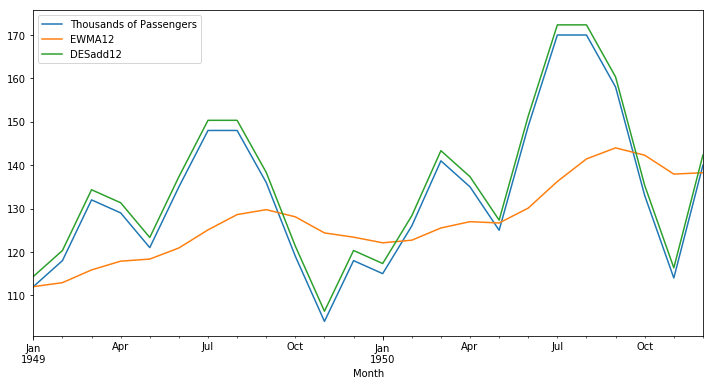

In [17]:
df[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Here we can see that Double Exponential Smoothing is a much better representation of the time series data.<br>
Let's see if using a multiplicative seasonal adjustment helps.

In [18]:
df['DESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.336774,112.049247
1949-02-01,118,112.923077,112.923077,120.336774,118.051885
1949-03-01,132,115.857988,115.857988,134.336774,132.058041
1949-04-01,129,117.879836,117.879836,131.336774,129.056722
1949-05-01,121,118.359861,118.359861,123.336774,121.053204


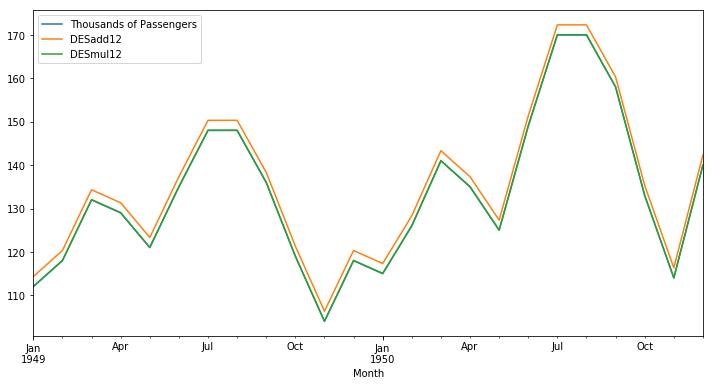

In [19]:
df[['Thousands of Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True); 

___
## Triple Exponential Smoothing
Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data. 



In [20]:
df['TESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head() 

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.336774,112.049247,113.081280
1949-02-01,118,112.923077,112.923077,120.336774,118.051885,120.550730
1949-03-01,132,115.857988,115.857988,134.336774,132.058041,135.527373
1949-04-01,129,117.879836,117.879836,131.336774,129.056722,133.155127
1949-05-01,121,118.359861,118.359861,123.336774,121.053204,125.656203


In [21]:
df['TESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

,Thousands of Passengers,EWMA12,SES12,DESadd12,DESmul12,TESadd12,TESmul12
Month,,,,,,,
1949-01-01,112,112.000000,112.000000,114.336774,112.049247,113.081280,111.753654
1949-02-01,118,112.923077,112.923077,120.336774,118.051885,120.550730,118.993207
1949-03-01,132,115.857988,115.857988,134.336774,132.058041,135.527373,133.458671
1949-04-01,129,117.879836,117.879836,131.336774,129.056722,133.155127,127.957617
1949-05-01,121,118.359861,118.359861,123.336774,121.053204,125.656203,121.027379


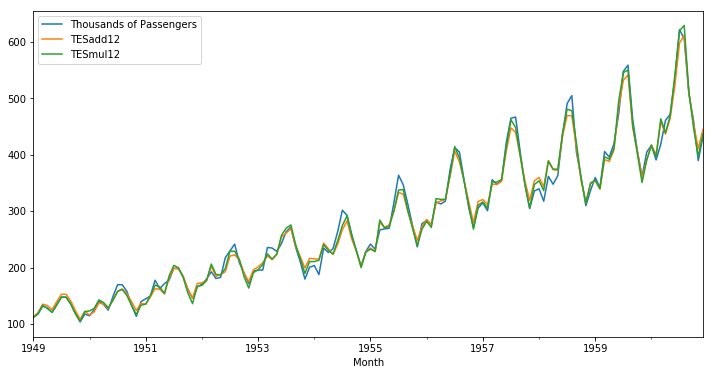

In [22]:
df[['Thousands of Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

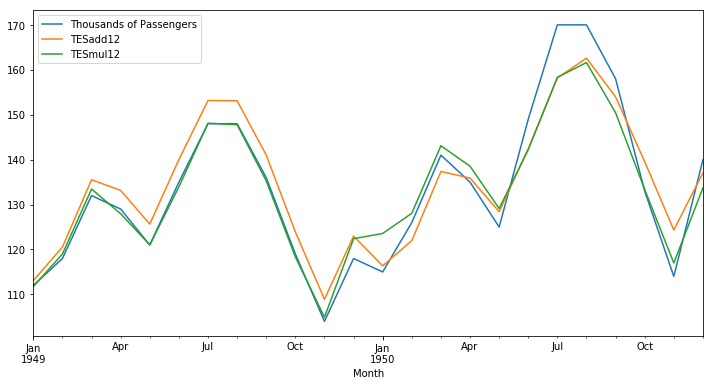

In [23]:
df[['Thousands of Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Based on the plot above, we might think that Triple Exponential Smoothing does a poorer job of fitting than Double Exponential Smoothing. The key here is to consider what comes next - <em>forecasting</em>. We'll see that having the ability to predict fluctuating seasonal patterns greatly improves our forecast.

# Choosing ARIMA Orders : Auto-Arima
> *p* is the order of the AR model, i.e. number of lags included in the model
<br>
> *d* is the degree of Differencing, i.e. number of time data had its past value subtracted/differenced
<br>
> *q* is the order of the Moving Average, i.e. size of the MA window

The main priority of this step is to pick the order of AR and MA compnonent, and then I order if required. It can be done by two ways:
- **Manually via ACF-PACF plots**: If the AC plots shows +ve Auto-Correlation at the very first lag, then it usggests to us AR terms in relation to lags, MA terms for -ve Auto-Correlation
- **Grid Search**: At times it could be really difficult to read PACF/ACF plots, which probably will add human error, so it is better to perform fird search across p,d,q values to find the most optimal choice

This is done by making use of ***PyramidARIMA*** library, which runs on top of statsmodel's ARIMA. <br>
It searches across various combination of p,d,q and P,D,Q and returns the best combination. This is achieved by minimising ``` Akaike Information Criterion (AIC) ```  value.
> AIC = $2k - 2ln(\hat{L})$ <br>
> Where *k* number of params and *L* is the value of MLE

**ARMA** is defined as
$(1-\sum_{i=1}^p \alpha_{i}L^i)X_{t} = (1+\sum_{i=1}^q \Theta_{i}L^i)\epsilon_{t}$

**ARIMA** is defined as
$(1-\sum_{i=1}^p \Phi ^iL^i) (1-L)^d X_{t} = (1+\sum_{i=1}^q \theta_{i} L^i)\epsilon_{t}$

> *L*=Lag operator

In [76]:
# Load a seasonal dataset
df1 = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a nonseasonal dataset
df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [79]:
from pmdarima import auto_arima

step_wise_fit = auto_arima(df2['Births'], start_p=0,start_q=0, seasonal=False, trace=True)

Fit ARIMA: order=(0, 1, 0); AIC=2650.760, BIC=2658.555, Fit time=0.039 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2565.234, BIC=2576.925, Fit time=0.102 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2463.584, BIC=2475.275, Fit time=0.189 seconds
Fit ARIMA: order=(1, 1, 1); AIC=2460.154, BIC=2475.742, Fit time=0.293 seconds
Fit ARIMA: order=(1, 1, 2); AIC=2460.515, BIC=2480.001, Fit time=1.160 seconds
Fit ARIMA: order=(2, 1, 2); AIC=2461.885, BIC=2485.268, Fit time=2.179 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2461.271, BIC=2480.757, Fit time=0.731 seconds
Total fit time: 4.725 seconds


In [81]:
#  Choosing the best combinaiton:
step_wise_fit.summary() # Smallest AIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1226.077
Method:                       css-mle   S.D. of innovations              7.000
Date:                Tue, 07 Jul 2020   AIC                           2460.154
Time:                        12:20:07   BIC                           2475.742
Sample:                             1   HQIC                          2466.350
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.014      1.068      0.286      -0.013       0.043
ar.L1.D.y      0.1299      0.056      2.334      0.020       0.021       0.239
ma.L1.D.y     -0.9694      0.019    -51.415      0.000      -1.006      -0.932
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.6996           +0.0000j            7.6996            0.0000
MA.1            1.0316           +0.0000j            1.0316            0.0000
-----------------------------------------------------------------------------
"""

In [84]:
# m is time-period for seasonal differencing, 
# i.e. m=1 for annual data, m=4 for quaterly data, m=7 for daily data,  m=12 for monthly data, m=52 for weekly data
step_wise_fit2 = auto_arima(df1['Thousands of Passengers'], start_p=0,start_q=0, seasonal=True, m=12, trace=True) 

Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=1415.278, BIC=1421.203, Fit time=0.033 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1299.259, BIC=1311.110, Fit time=0.445 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=1398.827, BIC=1407.716, Fit time=0.235 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1301.228, BIC=1316.042, Fit time=0.681 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 12); AIC=1304.383, BIC=1313.271, Fit

In [85]:
step_wise_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(0, 0, 1, 12)   Log Likelihood                -626.801
Date:                            Tue, 07 Jul 2020   AIC                           1267.601
Time:                                    12:24:48   BIC                           1288.341
Sample:                                         0   HQIC                          1276.029
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7024      0.168      4.169      0.000       0.372       1.033
ar.L1          1.4368      0.109     13.169      0.000       1.223       1.651
ar.L2         -0.7066      0.080     -8.815      0.000      -0.864      -0.549
ma.L1         -1.4832      0.174     -8.524      0.000      -1.824      -1.142
ma.L2          0.5033      0.175      2.877      0.004       0.160       0.846
ma.S.L12       0.7444      0.077      9.730      0.000       0.594       0.894
sigma2       345.6775     37.222      9.287      0.000     272.723     418.631
===================================================================================
Ljung-Box (Q):                      164.01   Jarque-Bera (JB):                10.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.46   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Use the best ARIMA model params to make predictions about the Test data

In [ ]:
arima_model = auto_arima(train, seasonal=True, m=12, trace=True)
arima_model.summary()

In [ ]:
predictions = pd.DataFrame(arima_model.predict(n_periods=3),index=test.index)
predictions.columns = ['Predicted_Passengers']


In [ ]:
plt.plot(test,label="Test")
plt.plot(predictions,label="Predicted_Pasengers")
plt.legend(loc="upper left")
plt.show();

## TSA Evaluation Metrics
###  Most common Evaluation Metrics for TSA/Regression Analysis:

@joydeepubuntu's [Blog](https://medium.com/@joydeepubuntu/common-metrics-for-time-series-analysis-f3ca4b29fe42) <br>
Rob Hyndmans's [Suggestions](https://www.sciencedirect.com/science/article/abs/pii/S0169207006000239) <br>
                                                                                                          
- $y_{i}$ : **real value** of the test data
- $\hat y_{i}$: **Predicted value** from our forecast
<br>`And Residual is how far the actual value is from the predicted value`, i.e. error in a prediciton
> here, $y_{i}-\hat y_{i}$ is the ***residual component***

<br>`-ve residual value = predicted value fall below the actual value`
<br>`+ve residual value = predicted value falls above the actual value`

1) <b> Mean Squared Error </b>: MAE misses on some large errors due to MEAN of rest of the values, thus MSE is more popular => 
$ \frac{1}{n} \sum_{i=1}^n (y_{i} - \hat y_{i})^2 $

```python
>>> from sklearn.metrics import mean_squared_error
>>> print(mean_squared_error(y_pred, y_true))
0.375
```
<br>

2) <b> Root Mean Squared Error </b>: Due to the square of residual values in MSE, units are also squared, i.e. $ Dollar^2, count of people^2,etc.$, thus
<br>
$\sqrt{\frac{1}{n} \sum_{i=1}^n (y_{i} - \hat y_{i})^2}$

```python
>>> from sklearn.metrics import mean_squared_error
>>> mse=mean_squared_error(y_pred, y_true)
>>> print(np.sqrt(rmse))
0.06
```
<br>

3) <b>Mean Absolute Error</b>:  Mean of the absolute value of errors => 
$ \frac{1}{n} \sum_{i=1}^n | y_{i} - \hat y_{i} | $
```python
>>> from sklearn.metrics import mean_absolute_error
>>> print(mean_absolute_error(y_true, y_pred))
0.5

>>> from sklearn.metrics import median_absolute_error
>>> print(median_absolute_error(y_true, y_pred))
0.5
```
<br>

4) <b> Mean Absolute Percentage Error </b>: 
$ \frac{1}{n} \sum_{i=1}^n \left\lvert{\frac{y_{i}-\hat y}{y_{i}}}\right\rvert $ or 
$ \frac{1}{n} \sum_{i=1}^n \left\lvert{\frac{Act_{i}- F_{i}}{Act_{i}}}\right\rvert $
<br> 
MAPE doesn't has nay implementation in sci-kit learn, thus <br>

```python
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```
<br>

5) <b> Symmetric Mean Absolute Percentage Error </b>: 
SMAPE = $\frac{100\%}{n} \sum_{t=1}^n \frac{|F_{t}-A_{t}|}{(|A_{t}|+|F_{t}|)/2}$
<br> 
SMAPE doesn't has nay implementation in sci-kit learn, thus <br>

```python
def smape(Act, Fcst):
    smape_val = round(100/len(Act) * np.sum(2 * np.abs(Fcst - Act) / (np.abs(Act) + np.abs(Fcst))),2)
    return smape_val
```
<b><i> Reason for divison by 2 in sMAPE is justified by [Spyros Makridakis]("https://sci-hub.tw/10.1016/0169-2070(93)90079-3")</i></b> <br>
MAPE as an accuracy measure can be influenced by some problems:	
- Equal errors above the actual value result in a greater APE (Absolute Percentage Error) than those below the actual value. For instance, when the actual value is 150 and the forecast is 100 (an error of 50) the APE(|(Act-Fcst/Act)|) is: 33%
- However, when the actual is 100 and the forecast 150 the APE is 50%
- This problem can be easily corrected by dividing the error (Act - Fcst) by the average of both Act and Fcst i.e.  (Act + Fcst)/2
- The above formula will provide the APE of 40% in both cases

<br>
6) <b> $R^2$ </b>: Is a measure of how close each datapoint fits the regression line, So it tells us, how well the regression line predicts the actual value

```python
>>> from sklearn.metrics import r2_score
>>> r2_score(y_true, y_pred)
0.9486081370449679
```

@joydeepubuntu's [Blog](https://medium.com/@joydeepubuntu/common-metrics-for-time-series-analysis-f3ca4b29fe42) <br>
Rob Hyndmans's [Suggestions](https://www.sciencedirect.com/science/article/abs/pii/S0169207006000239) <br>